# Project Details
Your tasks in this project are as follows:

Data wrangling, which consists of:
- Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
- Assessing data
- Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations


# Dataset: WeRateDogs Twitter Data

### Description of WE RATE DOGS :
The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

In [1]:
import sys
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install config

     |████████████████████████████████| 147 kB 176 kB/s eta 0:00:01


In [1]:
# Iniallizing : Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns


from numpy import median
import requests
import tweepy
import os
import json
import sys


#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from datetime import datetime
from config import Config
import re

# 1. Gathering Data

### WeRateDogs Twitter Archive

In [2]:
#Reading data from the WeRateDogs Twitter Archive

archive = pd.read_csv('twitter-archive-enhanced-2.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Retreiving Images 

In [3]:
#Retreiving the image predictions from Udacity server
retrieve = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
# Saving the obtained data 
with open('image-predictions.tsv', 'wb') as file:
    file.write(retrieve.content)

In [6]:
# create dataframe
df_img = pd.read_csv('image-predictions.tsv', sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Authorizing Twitter

In [7]:
#consumer_key = '*************************'
#consumer_secret = '*************************'
#access_token = '*************************'
#access_secret = '*************************'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

### Extracting more tweets from WeRateDogs

In [8]:
# complete information using twitter API
#with open('tweet_json.txt','w') as outfile:
    #call infos
    #for i in archive['tweet_id']:
        #handling exception
        #try:
            #tweet = api.get_status(i,tweet_mode='extended')
            #json.dump(tweet._json, outfile)
            #outfile.write("\n")
        #except:
            #e = os.sys.exc_info()[0]
            
# inspiration from try/except : https://wiki.python.org/moin/HandlingExceptions

In [9]:
# Defining the elements to be retained 
retain_elements = ['id', 'favorite_count', 'retweet_count']

# Defining the required Dictionary
data = []
with open('tweet_json.txt', 'r') as r: 
    json_tweet = r.readline()
    while json_tweet:
        dictionnary = json.loads(json_tweet)
        data_row = dict((i, dictionnary[i]) for i in retain_elements)
        data.append(data_row)
        json_tweet = r.readline()
        
            
# create DataFrame    
df_data = pd.DataFrame.from_dict(data)

# confirm
df_data.head()

,id,favorite_count,retweet_count
0,892420643555336193,36371,7739
1,892177421306343426,31328,5729
2,891815181378084864,23608,3790
3,891689557279858688,39675,7904
4,891327558926688256,37881,8526


# 2. Assessing

### Assessing the Archive

In [10]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Observations from Archive Dataset:
- The rows need to be suppressed if the value is a non-null to conserve only original tweets for the coulumn data corresponding to : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_statud_timestamp
- The source contains html residues
- The variables doggo, floofer, pupper and puppo present in the data represent one single variable and it should be a part of a single column
- The "timestamp" needs to be converted into datetime.
- We can observe that there are some 'None' objects present in "doggo", "floofer", "pupper" and "puppo" which have to be convert into 'NaN'.
- Some entries are missing expanded URL's.
- The "tweet_id" is an 'INT' should be converted to 'string' datatype.

In [21]:
# Checking for Duplicate values

archive['tweet_id'].duplicated().sum()

0

In [39]:
# Defining Stop Words function
# By taking a data frame column and a column name and print the number of stop words in the column

def stop_words(data_frame_column,name):
    count=0
    for word in data_frame_column:
        if word in ENGLISH_STOP_WORDS:
            count+=1
    print('',name,':',count,'')

In [44]:
# Here we  are checking the count of stop-words for each column in the data frame
print ("Number of stop-words in each column")
stop_words(archive['tweet_id'],'tweet_id')
stop_words(archive['timestamp'],'timestamp')
stop_words(archive['source'],'source')
stop_words(archive['expanded_urls'],'expanded_urls')
stop_words(archive['rating_numerator'],'rating_numerator')
stop_words(archive['rating_denominator'],'rating_denominator')
stop_words(archive['name'],'name')
stop_words(archive['doggo'],'doggo')
stop_words(archive['floofer'],'floofer')
stop_words(archive['pupper'],'pupper')
stop_words(archive['puppo'],'puppo')

Number of stop-words in each column
 tweet_id : 0 
 timestamp : 0 
 source : 0 
 expanded_urls : 0 
 rating_numerator : 0 
 rating_denominator : 0 
 name : 87 
 doggo : 0 
 floofer : 0 
 pupper : 0 
 puppo : 0 


### Observation
- The name column has multiple stop words

In [45]:
# Defining a function to detect the 'None' string
# By taking a data frame column and a column name and print the number of 'None' string in the column

def detect_none(data_frame_column,name):
    count=0
    for word in data_frame_column:
        if word == 'None':
            count+=1
    print('', name, ':',count,'')

In [49]:
# Calling the detect_none function defined above
print ("Number of 'None' string in a column \n")
detect_none(archive['tweet_id'],'tweet_id')
detect_none(archive['timestamp'],'timestamp')
detect_none(archive['source'],'source')
detect_none(archive['expanded_urls'],'expanded_urls')
detect_none(archive['rating_numerator'],'rating_numerator')
detect_none(archive['rating_denominator'],'rating_denominator')
detect_none(archive['name'],'name')
detect_none(archive['doggo'],'doggo')
detect_none(archive['floofer'],'floofer')
detect_none(archive['pupper'],'pupper')
detect_none(archive['puppo'],'puppo')

Number of 'None' string in a column 

 tweet_id : 0 
 timestamp : 0 
 source : 0 
 expanded_urls : 0 
 rating_numerator : 0 
 rating_denominator : 0 
 name : 745 
 doggo : 2259 
 floofer : 2346 
 pupper : 2099 
 puppo : 2326 


### Observations : 

- As evident from above, the "name" column has a total of 745 'None' strings present.
- along with the columns "doggo", "floofer", "pupper" and "puppo".

In [50]:
# While observing the Data Frame, we notice a Double-Link in "expanded_urls" column data content

# Here is a sample of double urls
print('Sample of double URLs : ',archive.expanded_urls[6])

# Adding all double urls for retrieving the total count
double_urls = archive.expanded_urls.str.contains(r',').sum()

print('Number of double links: ',double_urls)

Sample of double URLs :  https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
Number of double links:  639


### Observation : 
- We can clearly see from above that a total of 639 double links are present within "expanded_urls" column data


In [27]:
# Finding the count of Denominators not equal to the normal value of '10' 
count_not_dec = 0
for i in archive['rating_denominator']:
    if i != 10 :
        count_not_dec += 1
        
print('The count of entries not equal to 10 is {}.'.format(count_not_dec))

The count of entries not equal to 10 is 23.


### Observations : 

- We can see that a total of 23 ratings do not have the denominator value as 10, which means these values are not rated out of 10.

In [51]:
# Calculating the number of values for which the Numerator is under 10 

count_num_lessthan_10 = 0
for num in archive['rating_numerator']:
    if num <= 9:
        count_num_lessthan_10 += 1
        
print('The count of Numerator values less than 10 is {}.'.format(count_num_lessthan_10))

The count of Numerator values less than 10 is 440.


### Observations : 

- Thus, we can see that a total of 440 entries have a Numerator value less than 10.

0    1976
1     366
2      14
Name: gender_number, dtype: int64

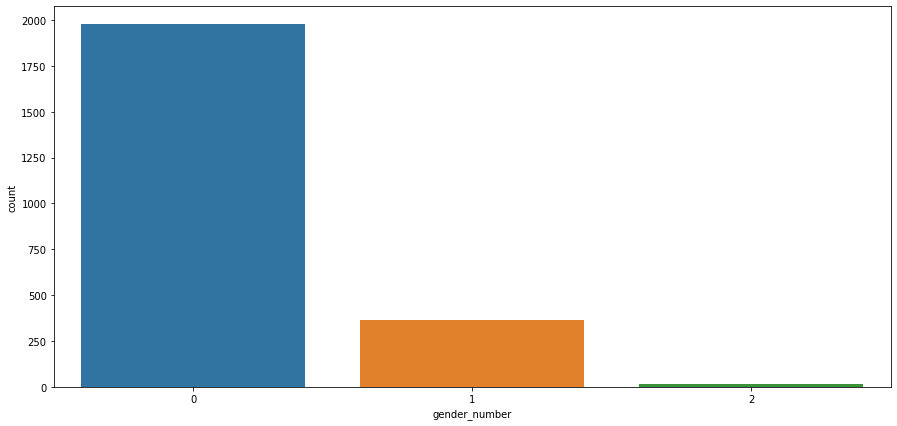

In [32]:
# Another assessment we come across is that there is a contradiction in dog categories.
# Here, we have multiple categories for dogs, namely "doggo","floofer","pupper","puppo".
# Ideally, we should have dog in a single category, and not in multiple ones as mentioned above.

# So, in order to maintain a single category, we start by transforming the category in 0 or 1
# Hence, we temporarily create a new category with sum if superior to 1 is false 

# Creating a copy 
archive_2 = archive.copy()

# Defining a procedure to convert the column into a bi-variate 0 and 1 
archive_2['doggo'] = archive_2['doggo'].apply(lambda x: 0 if x=='None' else 1)
archive_2['floofer'] = archive_2['floofer'].apply(lambda x: 0 if x=='None' else 1)
archive_2['pupper'] = archive_2['pupper'].apply(lambda x: 0 if x=='None' else 1)
archive_2['puppo'] = archive_2['puppo'].apply(lambda x: 0 if x=='None' else 1)

# Defining a new column "gender_number"
archive_2['gender_number']=archive_2.iloc[:,[13,14,15,16]].sum(axis=1)

# Measuring the number 
plt.figure(figsize=(15,7))
sns.countplot(archive_2.gender_number)

# Displaying the total count against each value
archive_2['gender_number'].value_counts()

### Observations :

- Hence, we can visualize that there are 14 rows, belonging in two categories.

### Assessing Images

In [59]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Observation:
- p1, p2 and p3 columns possess inconsistent writing.

In [60]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [63]:
# Checking duplicated values
df_img.duplicated().sum()

0

In [65]:
# Counting the number of images
df_img['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [68]:
# Finding the count for Stop-Words present in each columns

print ("Number of stop-words in each column")
stop_words(df_img_init['tweet_id'],'tweet_id')
stop_words(df_img_init['jpg_url'],'jpg_url')
stop_words(df_img_init['img_num'],'img_num')
stop_words(df_img_init['p1'],'p1')
stop_words(df_img_init['p1_conf'],'p1_conf')
stop_words(df_img_init['p2'],'p2')
stop_words(df_img_init['p2_conf'],'p2_conf')
stop_words(df_img_init['p3'],'p3')
stop_words(df_img_init['p3_conf'],'p3_conf')
stop_words(df_img_init['p1_dog'],'p1_dog')
stop_words(df_img_init['p2_dog'],'p2_dog')
stop_words(df_img_init['p3_dog'],'p3_dog')

Number of stop-words in each column
 tweet_id : 0 
 jpg_url : 0 
 img_num : 0 
 p1 : 0 
 p1_conf : 0 
 p2 : 0 
 p2_conf : 0 
 p3 : 0 
 p3_conf : 0 
 p1_dog : 0 
 p2_dog : 0 
 p3_dog : 0 


In [69]:
# Calculating the count of 'None' string
print ("Number of 'None' values in each column")
detect_none(archive['tweet_id'],'tweet_id')
detect_none(archive['timestamp'],'timestamp')
detect_none(archive['source'],'source')
detect_none(archive['expanded_urls'],'expanded_urls')
detect_none(archive['rating_numerator'],'rating_numerator')
detect_none(archive['rating_denominator'],'rating_denominator')
detect_none(archive['name'],'name')
detect_none(archive['doggo'],'doggo')
detect_none(archive['floofer'],'floofer')
detect_none(archive['pupper'],'pupper')
detect_none(archive['puppo'],'puppo')

Number of 'None' values in each column
 tweet_id : 0 
 timestamp : 0 
 source : 0 
 expanded_urls : 0 
 rating_numerator : 0 
 rating_denominator : 0 
 name : 745 
 doggo : 2259 
 floofer : 2346 
 pupper : 2099 
 puppo : 2326 


0    1243
1     347
3     324
2     161
Name: no_dog, dtype: int64

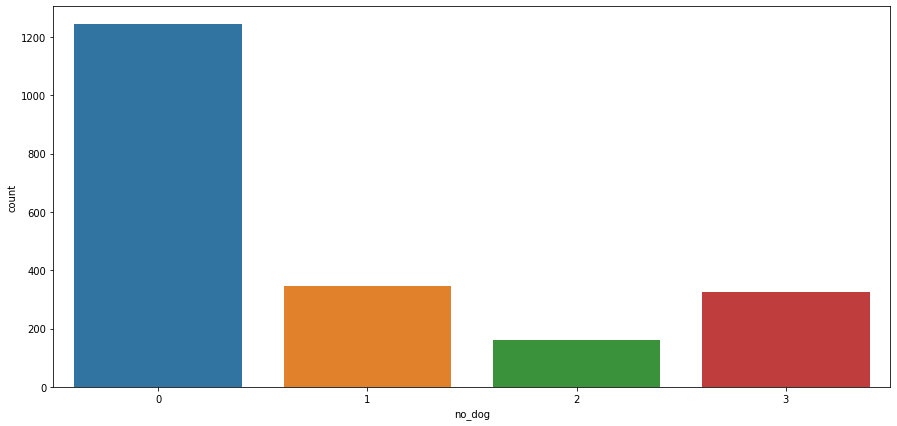

In [71]:
# Defining a check to verify if it's a dog

# We start off by transforming category in 0 or 1
# We make the use of a temporarily created new category 

# Generating a copy 
df_img_2 = df_img_init.copy()

# Defining a procedure to convert the column into a bi-variate 0 and 1
df_img_2['p1_dog'] = df_img_2['p1_dog'].apply(lambda x: 0 if x==True else 1)
df_img_2['p2_dog'] = df_img_2['p2_dog'].apply(lambda x: 0 if x==True else 1)
df_img_2['p3_dog'] = df_img_2['p3_dog'].apply(lambda x: 0 if x==True else 1)

# Creating a new column 
df_img_2['no_dog'] = df_img_2.iloc[:,[5,8,11]].sum(axis=1)

# Measuring the number 
plt.figure(figsize=(15,7))
sns.countplot(df_img_2.no_dog)

# Getting the Count 

df_img_2['no_dog'].value_counts()

### Observation:

- As seen above, for a total of 324 rows in the Data, no dogs are recognized.




### Assessing the data we have scrapped



In [75]:
df_data.head()

,id,favorite_count,retweet_count
0,892420643555336193,36385,7741
1,892177421306343426,31336,5730
2,891815181378084864,23612,3794
3,891689557279858688,39682,7907
4,891327558926688256,37883,8528


In [78]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              877 non-null    int64
 1   favorite_count  877 non-null    int64
 2   retweet_count   877 non-null    int64
dtypes: int64(3)
memory usage: 20.7 KB


In [79]:
# Checking duplicate values

df_data.duplicated().sum()

0

### Observation
- the 'id' has to be a string

## Overall Observation 
- The len of all three dataset should be same
- We have to merge all of them into one dataset

# Cleaning Data

In [81]:
# We will make copies of dataset for the cleaning purposes.

clean_archive = archive.copy()
clean_img = df_img.copy()
clean_data = df_data.copy()

### Cleaning Archive Dataset

In [83]:
# Cleaning the URLs: 

for i in range(len(clean_archive)):
    twt_id=clean_archive['tweet_id'][i]
    url = 'https://twitter.com/dog_rates/status/{}'.format(twt_id)
    clean_archive['expanded_urls'].replace(clean_archive['expanded_urls'][i],url,inplace=True)


In [84]:
# Verifying the changes made in the previous cell

clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2356 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [85]:
# Suppressing the rows with re-tweet and unnecessary columns

# Dropping the unnecessary rows

clean_archive = clean_archive[clean_archive['in_reply_to_status_id'].isnull()]
clean_archive = clean_archive[clean_archive['retweeted_status_id'].isnull()]

In [86]:
# Dropping the unnecessary columns

clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

In [87]:
# Verifying the changes made above 

print(len(archive)-len(clean_archive))
clean_archive.head(0)

259


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [88]:
# Cleaning the  HTML residues present in the Source

# Defing the procedure

clean_archive['source'] = clean_archive['source'].map(lambda x: x.lstrip('<a href=').rstrip('</a>'))


In [89]:

# Verifying whether the changes have been impacted successfully

clean_archive['source'].head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

In [90]:
# Changing the Data-type of ''timestamp'' to 'datetime'

clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

In [91]:
# Verifying the changes 

clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [92]:
# Changing the Data-type of "tweet_id" from 'INT' to 'string' 

clean_archive['tweet_id'] = clean_archive['tweet_id'].astype(str)

In [93]:

# Verifying the changes made

clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [95]:
## Suppressing the 'Stop-Words' in "name" column

# From manual observation, it is apparent that the Stop Words replace Name 
# Hence we suppress stop words as :  
for shabd in clean_archive['name']:
    if shabd in ENGLISH_STOP_WORDS:
        clean_archive['name']=clean_archive['name'].where(clean_archive['name']!=shabd, np.NaN)

In [96]:
# Verifying the changes made

stop_words(clean_archive['name'],'name')

 name : 0 


In [97]:
# Converting the "name" column into lower case

clean_archive['name'] = clean_archive['name'].str.lower()

# Verifying the changes
clean_archive['name']

0        phineas
1          tilly
2         archie
3          darla
4       franklin
          ...   
2351        none
2352         NaN
2353         NaN
2354         NaN
2355        none
Name: name, Length: 2097, dtype: object

In [98]:
# Replacing 'None' string with 'NaN'

clean_archive['name'] = clean_archive['name'].where(clean_archive['name'] != shabd, np.NaN) 
clean_archive['doggo'] = clean_archive['doggo'].where(clean_archive['doggo'] != shabd, np.NaN) 
clean_archive['floofer'] = clean_archive['floofer'].where(clean_archive['floofer'] != shabd, np.NaN) 
clean_archive['pupper'] = clean_archive['pupper'].where(clean_archive['pupper'] != shabd, np.NaN) 
clean_archive['puppo'] = clean_archive['puppo'].where(clean_archive['puppo'] != shabd, np.NaN) 

In [99]:
# Verifying the changes made

detect_none(clean_archive['name'],'name')
detect_none(clean_archive['doggo'],'doggo')
detect_none(clean_archive['floofer'],'floofer')
detect_none(clean_archive['pupper'],'pupper')
detect_none(clean_archive['puppo'],'puppo')

 name : 0 
 doggo : 0 
 floofer : 0 
 pupper : 0 
 puppo : 0 


In [100]:
# Monitoring the Numerator and Denominator Values

print('Ex 1: ',clean_archive['text'][1068])
print('Ex 2: ',clean_archive['text'][1165])
print('Ex 3: ',clean_archive['text'][2335])

Ex 1:  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Ex 2:  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Ex 3:  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


Here, we observe two different cases wherein the ratings are not following the standards. 

In Case 1, it is done so delibarately and is not an extraction problem, so we would be keeping it.
Whereas in Case 2, while performing the extraction, it chooses only the first fraction in the message, hence we should correct it.

In [101]:
# Defining a new dataframe filtered with the items to analyze 
to_analyze = clean_archive.loc[clean_archive['rating_denominator']!=10]

# Looking up the suspected data 
for i in to_analyze['text']:
    if '/10' in i:
        print(i)
        print(to_analyze[to_analyze['text']==i].index)

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Int64Index([1068], dtype='int64')
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Int64Index([1165], dtype='int64')
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Int64Index([1202], dtype='int64')
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Int64Index([1662], dtype='int64')
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Int64Index([2335], dtype='int64')


In [102]:
# Manual replacement of data 
clean_archive.loc[clean_archive.index == 1068, 'rating_numerator'] = 14
clean_archive.loc[clean_archive.index == 1165, 'rating_numerator'] = 13
clean_archive.loc[clean_archive.index == 1202, 'rating_numerator'] = 11
clean_archive.loc[clean_archive.index == 1662, 'rating_numerator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_numerator'] = 9

clean_archive.loc[clean_archive.index == 1068, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1165, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1202, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1662, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_denominator'] = 10

In [104]:
# Fixing the Numerators containing Decimal Values

# Locating the entries with Numerator containing Decimal Values

for row in test['text']:
    detect = '(\d+\.\d+)\/(\d+)'
    srch = re.search(detect,row)
    if srch != None:
        Ind=test.loc[test['text']==row].index[0]
        Txt = archive.text[Ind]
        Num = archive.rating_numerator[Ind]
        print('Index is : ',Ind,'\n',
              'Text is : ',Txt,'\n'
              'The Numerator is : ',Num,'\n',
             )
        

Index is :  45 
 Text is :  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
The Numerator is :  5 

Index is :  340 
 Text is :  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… 
The Numerator is :  75 

Index is :  695 
 Text is :  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
The Numerator is :  75 

Index is :  763 
 Text is :  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
The Numerator is :  27 

Index is :  1689 
 Text is :  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 
The Numerator is :  5 

Index is :  1712 
 Text is :  Here we have uncovere

In [105]:
# Manual replacement of Data 

clean_archive.loc[clean_archive.index == 45, 'rating_numerator'] = 13.5
clean_archive.loc[clean_archive.index == 340, 'rating_numerator'] = 9.75
clean_archive.loc[clean_archive.index == 695, 'rating_numerator'] = 9.75
clean_archive.loc[clean_archive.index == 763, 'rating_numerator'] = 11.27
clean_archive.loc[clean_archive.index == 1689, 'rating_numerator'] = 9.5
clean_archive.loc[clean_archive.index == 1712, 'rating_numerator'] = 11.26

In [106]:
# Verifying the changes made

clean_archive.loc[45]

tweet_id                                             883482846933004288
timestamp                                     2017-07-08 00:28:19+00:00
source                "http://twitter.com/download/iphone" rel="nofo...
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              bella
doggo                                                               NaN
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
Name: 45, dtype: object

In [107]:
# Dog stage

# Creating a column

# Defining a function aimed at creating a column with all stage

def Dog_Stage(row):
    # Defining a list to store the data
    stg_lst = []
    # Setting the conditional
    if row['doggo'] == 'doggo':
        # Adding the entry to the list if it satisfies the condition
        stg_lst.append('doggo')
    if row['floofer'] == 'floofer':
        stg_lst.append('floofer')
    if row['pupper'] == 'pupper':
        stg_lst.append('pupper')
    if row['puppo'] == 'puppo':
        stg_lst.append('puppo')
    if len(stg_lst) < 1: 
        row['stage'] = 'None'
    else: 
        row['stage'] = ' and '.join(stg_lst)
    return row



In [108]:
# Applying the "dog-stage" function to each record
clean_archive = clean_archive.apply(Dog_Stage, axis=1)

In [109]:
# Discarding unwanted entries
clean_archive = clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [111]:
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,franklin,None


In [112]:
# Inspecting the text when dog has two stages
for ind, rw in clean_archive.iterrows():
    if ' and ' in rw['stage']:
        print (ind,rw['stage'],'\n','\n',
               rw['text'],'\n','\n')

191 doggo and puppo 
 
 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel 
 

200 doggo and floofer 
 
 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 
 

460 doggo and pupper 
 
 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7 
 

531 doggo and pupper 
 
 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 
 

575 doggo and pupper 
 
 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj 
 

705 doggo and pupper 
 
 This is Pinot. He's a sophisticated doggo. You can 

191 doggo,puppo correction puppo

200 doggo,floofer correction floofer

460 doggo,pupper correction pupper

*** 531 doggo,pupper correct ***

575 doggo,pupper correction doggo

705 doggo,pupper correction doggo

*** 733 doggo,pupper correct ***

*** 889 doggo,pupper correct ***

956 doggo,pupper correction NaN

*** 1063 doggo,pupper correct ***

*** 1113 doggo,pupper correct ***


In [114]:
# Implementing the corrections manually

clean_archive.loc[clean_archive.index == 191, 'stage'] = 'puppo'
clean_archive.loc[clean_archive.index == 200, 'stage'] = 'floofer'
clean_archive.loc[clean_archive.index == 460, 'stage'] = 'pupper'
clean_archive.loc[clean_archive.index == 575, 'stage'] = 'doggo'
clean_archive.loc[clean_archive.index == 705, 'stage'] = 'doggo'
clean_archive.loc[clean_archive.index == 956, 'stage'] = np.NaN

In [115]:
# transform None in NaN
clean_archive['stage'] = clean_archive['stage'].where(clean_archive['stage']!=shabd, np.NaN) 

In [116]:
# Verifying the changes
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2012 non-null   object             
 8   stage               335 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(6)
memory usage: 243.8+ KB


### Cleaning Image dataset

In [118]:
# Changing the Data-type of "tweet_id" to string

clean_img['tweet_id']=clean_img['tweet_id'].astype(str)



In [120]:
# Verifying the changes
clean_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [121]:
# Fixing the Inconsistent cases
clean_img['p1'] = clean_img['p1'].str.lower()
clean_img['p2'] = clean_img['p2'].str.lower()
clean_img['p3'] = clean_img['p3'].str.lower()

In [122]:
# Verifying the changes
clean_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [124]:
# Verifying whether Dog or not

# Generating a new columns

clean_img['dog']=df_img_2['no_dog'].apply(lambda x: False if x==3 else True )

In [125]:
# Verifying the changes

print(clean_img['dog'].head(),clean_img['dog'][17])

0    True
1    True
2    True
3    True
4    True
Name: dog, dtype: bool False


### Cleaning our scrapped dataset

In [127]:
# Modifying the data type of id to string 
clean_data['id'] = clean_data['id'].astype(str)

# Verifying the Changes
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              877 non-null    object
 1   favorite_count  877 non-null    int64 
 2   retweet_count   877 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.7+ KB


### Merging all 3 dataset

In [129]:
# Merge and suppress row without image


# Performing inner joins on 'id' to merge the data

df_final = clean_img.merge(clean_archive, left_on='tweet_id',right_on='tweet_id',how='inner')
df_final = df_final.merge(clean_data,left_on='tweet_id',right_on='id',how='inner')

# Dropping unnecessary fields
df_final = df_final.drop(['id'], axis=1)

In [130]:
# Verifying the Changes
df_final.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'favorite_count',
       'retweet_count'],
      dtype='object')

In [131]:
#Storing data

df_final.to_csv('twitter_archive_master.csv',index=False)


# Investigating Dataset

In [132]:
# Copying the data frame

df = df_final.copy()

In [133]:
# Getting the Description of retweet variable
df['retweet_count'].describe()

count      651.000000
mean      4649.364055
std       5233.496230
min        154.000000
25%       2069.000000
50%       3192.000000
75%       5019.500000
max      57054.000000
Name: retweet_count, dtype: float64

In [145]:
# Looking up the record with the miminum retweet 
for ind, rw in df.iterrows():
    if rw['retweet_count']==154:
        print ('index: ',ind,'\n','\n',
               rw,'\n','\n',
              )

index:  96 
 
 tweet_id                                             776088319444877312
jpg_url                 https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg
img_num                                                               3
p1                                                             web_site
p1_conf                                                        0.999916
p1_dog                                                            False
p2                                                                  pug
p2_conf                                                     7.65702e-05
p2_dog                                                             True
p3                                                                 menu
p3_conf                                                     2.16468e-06
p3_dog                                                            False
dog                                                                True
timestamp                                     201

In [146]:
# Looking up the row with the maximum retweet 
for ind, rw in df.iterrows():
    if rw['retweet_count']==57054:
        print ('index: ',ind,'\n','\n',
               rw,'\n','\n',
              )

index:  257 
 
 tweet_id                                             807106840509214720
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/80710...
img_num                                                               1
p1                                                            chihuahua
p1_conf                                                         0.50537
p1_dog                                                             True
p2                                                           pomeranian
p2_conf                                                        0.120358
p2_dog                                                             True
p3                                                          toy_terrier
p3_conf                                                       0.0770081
p3_dog                                                             True
dog                                                                True
timestamp                                     20

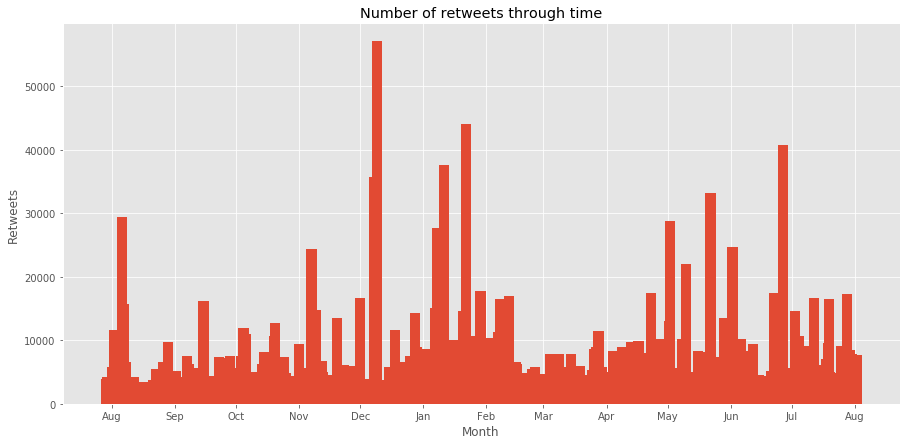

In [148]:
# Getting the evolution of tweet sharing 
df_plot=df.copy()

# Setting up the date as index
df_plot.set_index('timestamp',inplace=True)

# Setting up the plot style to 'ggplot'
plt.style.use('ggplot')

# Plotting the data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_plot.index, df_plot['retweet_count'],width=5)


# Setting up the ticks for each week
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Setting the format for major ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Setting up the axis and graph titles
ax.set_title('Number of retweets through time')
ax.set_xlabel('Month')
ax.set_ylabel('Retweets')

# Generating the figure
fig.savefig('retweets_through_time.png')

### Visualizing variables

In [150]:
# Defining the function to remove the outliers

def discard_outliers(dataframe, column):
    '''
    the function take a dataframe and a column as argument 
    cut the outlier of the dataframe
    and return the new dataframe shape
    '''
    q3 = dataframe[column].quantile(0.75)
    q1 = dataframe[column].quantile(0.25)
    IQR = q3 - q1
    out_1 = q1 - 1.5*IQR
    out_2 = q3 + 1.5*IQR
    dataframe = dataframe.loc[((dataframe[column] > out_1) & (dataframe[column] < out_2))]
    return dataframe

In [151]:
# apply function to our dataframe

df = discard_outliers(df,'retweet_count')

In [152]:
# Verifying the Changes
df.shape

(594, 23)